# 비지도학습

- 비지도 변환 (unsupervised transformation) - 차원축소 (dimensionality reduction)
 - 다양한 특성들로 profile되어 있는 샘플 데이터들에서 정보가 많은 특성들로 추려준다. 


- 군집 (clustering) - 구분 <sub>분류 (classification) 와는 다르다.</sub> 
 - 다양한 특성들로 profile되어 있는 샘플 데이터들에서 비슷한 특성 profile을 가지는 샘플들끼리 묶어준다. 


In [3]:
%matplotlib inline
import mglearn

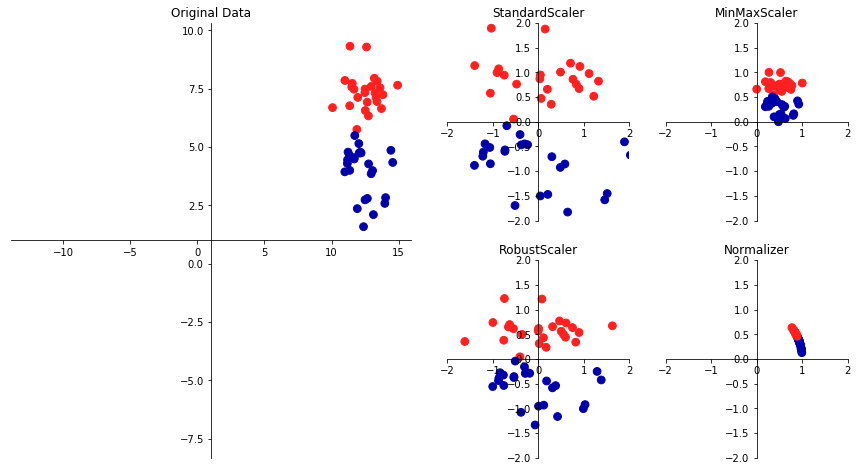

In [5]:
# 전처리 알고리즘들 역시 엄밀히 말하면 비지도 학습에 들어간다. 기존의 데이터가 구분되기 쉽도록 기준을 정해 좍좍 펴준다. ;;
mglearn.plots.plot_scaling()

- Standard scaler : 평균을 0, 분산을 1로 변환시켜버린다. 
- Robust scaler : Standard scaler와 비슷한데 극단값의 영향을 받지 않도록 하였음. 
- MinMax scaler : 모든 특성이 0과 1 사이에 존재하도록 변형 
- Normalizer : 데이터를 반지름이 1인 원에 투영하여 변형 (이렇게 해야하는 특별한 목적이 있을때가 있다고 한다.)

# 주성분 분석 (Principal component analysis, PCA)

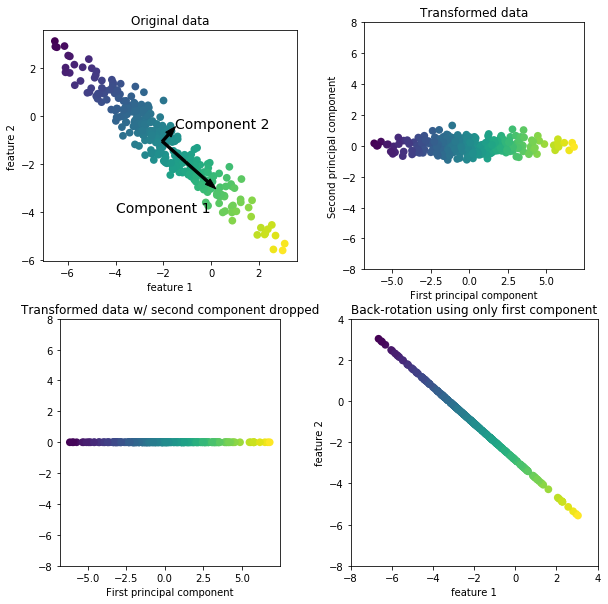

In [10]:
mglearn.plots.plot_pca_illustration()

- 데이터를 우측 하단 처럼 만들어주는 계수세트 1 (first comonent) 
- 데이터의 분산을 설명하는 계수세트들을 만들고 순위를 매겨 1,2번을 나눈다. 
- 마치 전처리 문제처럼 데이터를 변형한다. 

In [12]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [13]:
cancer = load_breast_cancer()

In [15]:
cancer.data.shape

(569, 30)

In [16]:
cancer.target.shape

(569,)

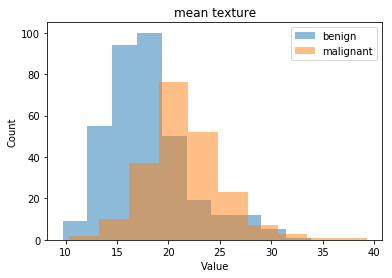

In [32]:
# 일단 데이터의 특성을 잘 모른다고 보고 데이터를 관찰 해보자.
mask_fine = cancer.target == 1
mask_notg = cancer.target == 0 

feature_order = 1
plt.title(cancer.feature_names[feature_order])
plt.hist(cancer.data[:,feature_order][mask_fine],alpha=0.5,label='benign')
plt.hist(cancer.data[:,feature_order][mask_notg],alpha=0.5,label='malignant')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
# PCA를 수행하기 전에 전처리를 하는 것이 좋다. 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [34]:
# 양성이냐 음성이냐 정답지 없이, 분산만을 가지고 분석한다. 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

In [35]:
X_scaled.shape

(569, 30)

In [37]:
X_pca.shape

(569, 2)

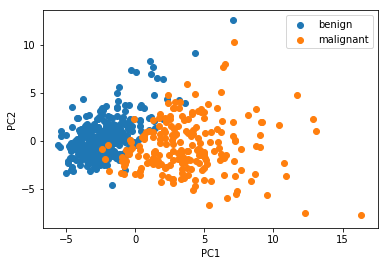

In [44]:
# 주성분 값으로 scatter plot을 그려보면 정답지에 비교해보았을때 명백히 나뉘어 질수 있도록 해준다. 
plt.scatter(X_pca[mask_fine][:,0],X_pca[mask_fine][:,1],label='benign')
plt.scatter(X_pca[mask_notg][:,0],X_pca[mask_notg][:,1],label='malignant')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [47]:
# 주성분이라는 것은 특성(feature)들의 계수의 집합이다. 
print pca.components_.shape
print pca.components_

(2, 30)
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [46]:
X_scaled.shape

(569, 30)

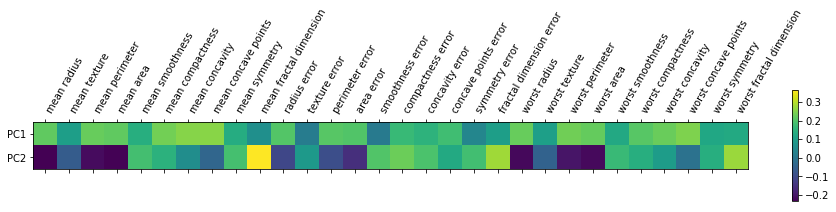

In [53]:
plt.matshow(pca.components_)
plt.yticks([0,1],['PC1','PC2'])
plt.xticks(range(0,30),cancer.feature_names,rotation=60,ha='left')
plt.colorbar()
plt.show()

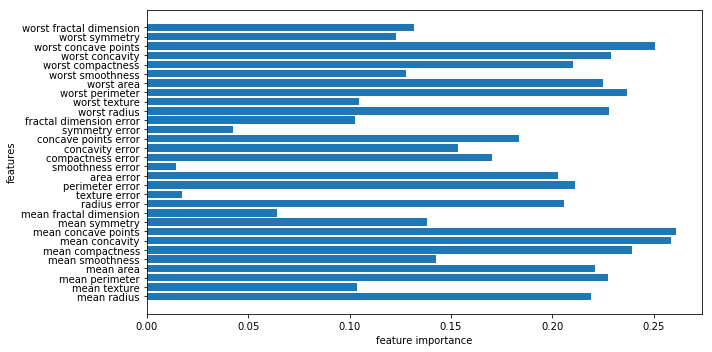

In [57]:
plt.figure(figsize=(10,5))
n_features = cancer.data.shape[1]
plt.barh(range(n_features),pca.components_[0,:],align='center')
plt.yticks(range(n_features),cancer['feature_names'])
plt.xlabel('feature importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()